<h1 style="font-size: 4rem"> <b> PRODIGY INFOTECH </b> </h1>

<h1 style="font-size: 2rem"> <b> Task Done By:- Maully Bhavsar</b> </h1>

<h1 style="font-size: 2rem"> <b> Problem Statment </b> </h1>

<h1 style="font-size: 2rem"><b>Predict survival on the Titanic and get familiar</b></h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<h1 style = "fontsize : 2rem"><b>Train Data Set</b></h1>

In [2]:
df_tr = pd.read_csv("train.csv")
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_tr.shape

(891, 12)

In [4]:
df_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_tr.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#drop ticket column
df_tr.drop(columns = 'Ticket' , inplace = True)

In [7]:
#drop cabin column
df_tr.drop(columns = 'Cabin',inplace = True)

In [8]:
#replqcing the mission in "age"column with mean value
df_tr['Age'].fillna(df_tr['Age'].mean(),inplace=True)



In [9]:
#finding mode value of embarked 
df_tr['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
df_tr['Embarked'].mode()[0]

'S'

In [11]:
#replacing the mission value in embarked value with mode value
df_tr['Embarked'].fillna(df_tr['Embarked'].mode()[0],inplace=True)

In [12]:
#again findong missing value
df_tr.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
df_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#finding no of people survived or not survived
df_tr['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

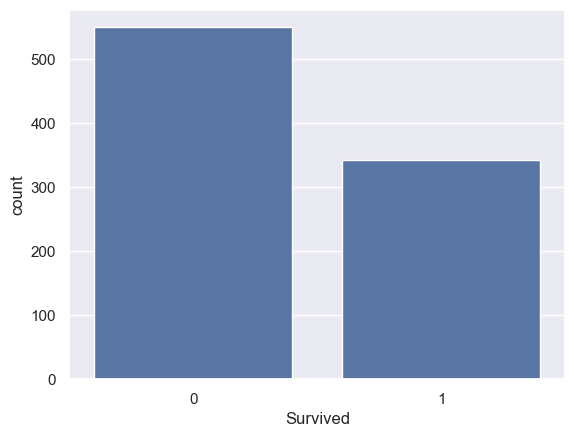

In [15]:
sns.set()
sns.countplot(x="Survived",data=df_tr)

In [16]:
#finding no of male and not female
df_tr['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

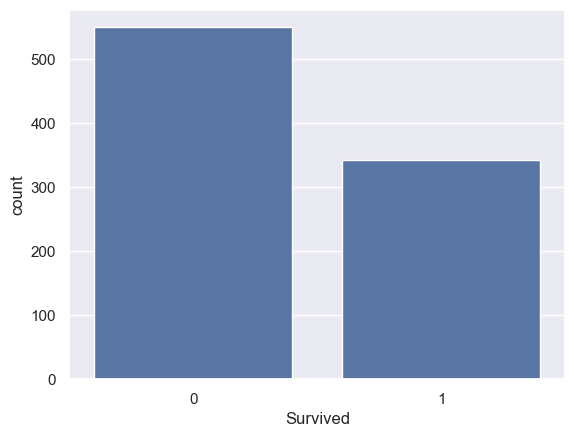

In [17]:
sns.set()
sns.countplot(x="Survived",data=df_tr)

<Axes: xlabel='Sex', ylabel='count'>

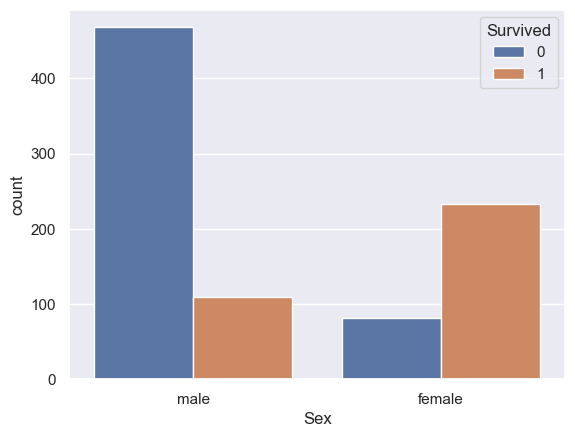

In [18]:
#no of survives
sns.countplot(x='Sex',hue='Survived',data=df_tr)


<Axes: xlabel='Pclass', ylabel='count'>

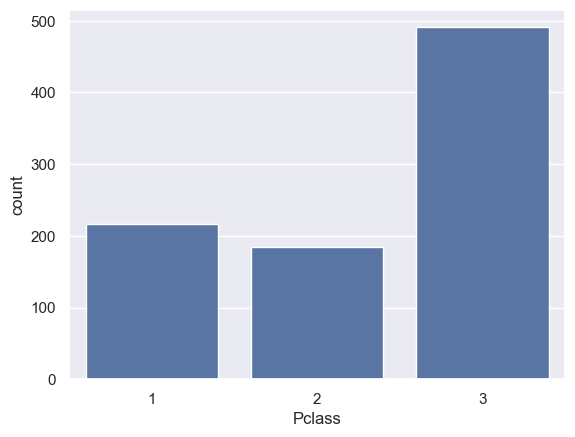

In [19]:
#graph of pclass 
sns.countplot(x="Pclass",data=df_tr)

<Axes: xlabel='Pclass', ylabel='count'>

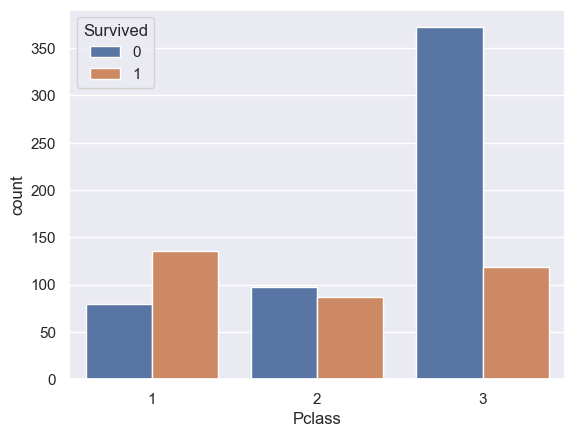

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=df_tr)

<Axes: xlabel='Embarked', ylabel='count'>

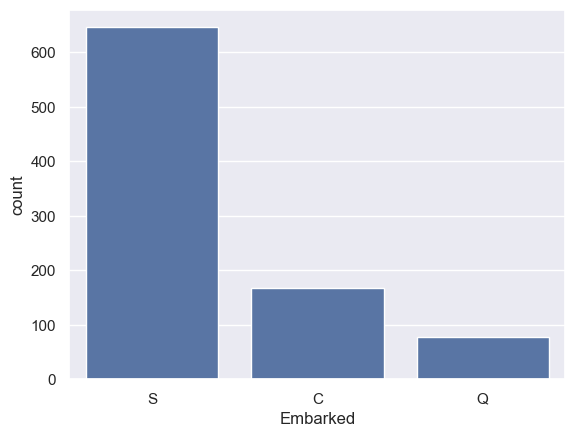

In [21]:
sns.countplot(x='Embarked',data=df_tr)

<Axes: xlabel='Embarked', ylabel='count'>

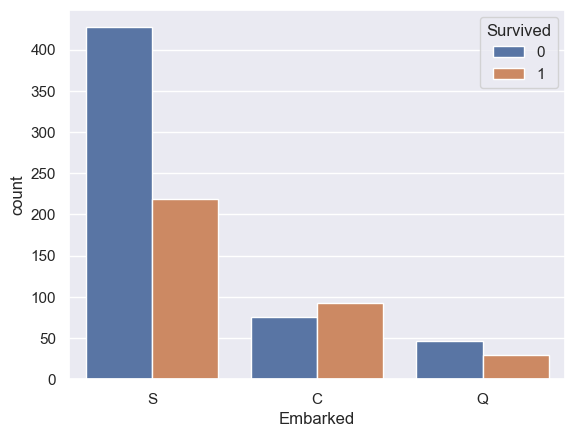

In [22]:
#graph for embarked value
sns.countplot(x='Embarked',hue='Survived',data=df_tr)

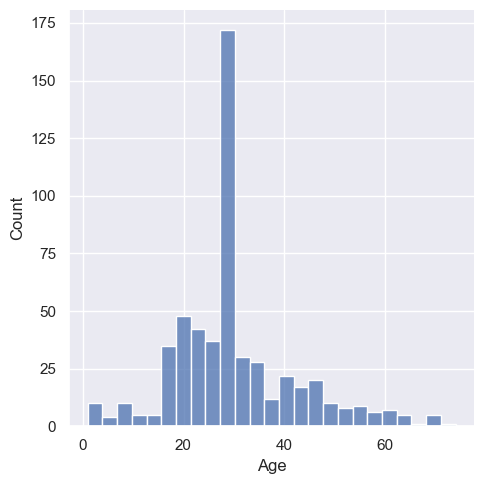

In [23]:
sns.displot(df_tr['Age'][df_tr['Survived']==0])

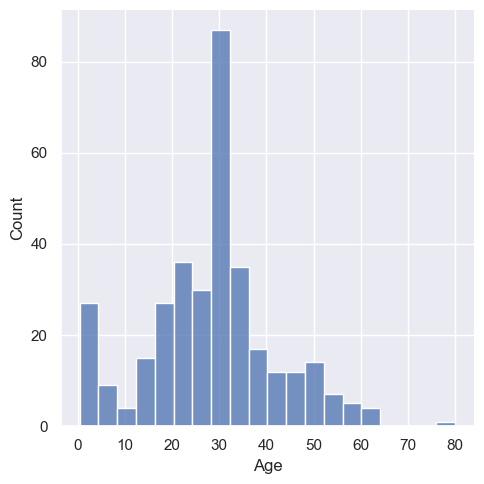

In [24]:
sns.displot(df_tr['Age'][df_tr['Survived']==1])

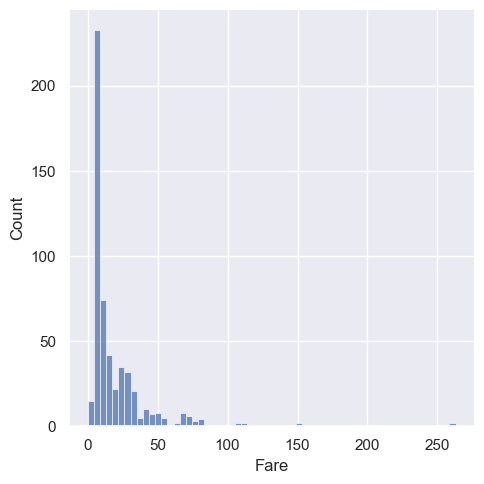

In [25]:
sns.displot(df_tr['Fare'][df_tr['Survived']==0])

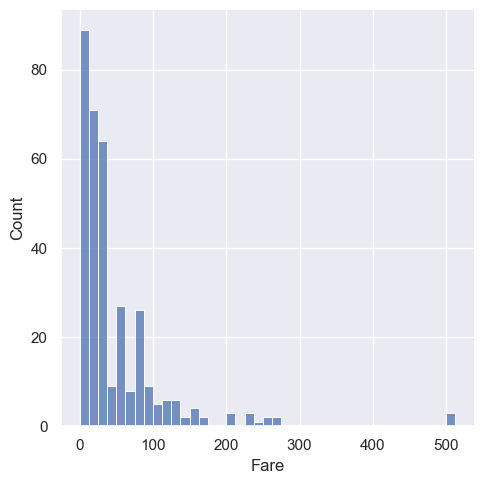

In [26]:
sns.displot(df_tr['Fare'][df_tr['Survived']==1])

In [27]:
#finding percentage of people survived
df_tr.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [28]:
#finding percentage of people genderwise
df_tr.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [29]:
df_tr['Family'] = df_tr['SibSp']+df_tr['Parch']+1
df_tr['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [30]:
df_tr.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [31]:
def cal(no):
    if no == 1:
        return "Along"
    elif no>1 and no<5:
        return "medium"
    else:
        return "Large"

In [32]:
df_tr['Family_size'] = df_tr['Family'].apply(cal)
df_tr.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,29.699118,0,0,50.0000,S,1,Along
839,840,1,1,"Marechal, Mr. Pierre",male,29.699118,0,0,29.7000,C,1,Along
842,843,1,1,"Serepeca, Miss. Augusta",female,30.000000,0,0,31.0000,C,1,Along
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,7.7958,S,1,Along
598,599,0,3,"Boulos, Mr. Hanna",male,29.699118,0,0,7.2250,C,1,Along


In [33]:
#drop the columns
df_tr.drop(columns=['SibSp','Parch','PassengerId','Family','Name'],inplace=True)

In [34]:
df_tr.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
299,1,1,female,50.000000,247.5208,C,medium
483,1,3,female,63.000000,9.5875,S,Along
732,0,2,male,29.699118,0.0000,S,Along
631,0,3,male,51.000000,7.0542,S,Along
111,0,3,female,14.500000,14.4542,C,medium


In [35]:
#perentage of survived embarked
df_tr.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [36]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Family_size  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [37]:
#encoding categorical columns
df_tr['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [38]:
df_tr['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [39]:
df_tr['Family_size'].value_counts()

Family_size
Along     537
medium    292
Large      62
Name: count, dtype: int64

In [40]:
df_tr.replace({'Sex':{'male':1,'female':2},'Embarked':{'S':0,'C':1,'Q':2},'Family_size':{'Along':0,'Medium':1,'Large':2}},inplace=True)

In [41]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Family_size  891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


<h1 style = "fontsize = 2rem"><b>Test Data Work</b></h1>

In [42]:
df_ts = pd.read_csv("test.csv")
df_ts


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
#checking num of rows and column
df_ts.shape

(418, 11)

In [44]:
#checking information
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [45]:
#add sibsp and parch 
df_ts['Family'] = df_ts['SibSp']+df_ts['Parch']+1
df_ts['Family']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family, Length: 418, dtype: int64

In [46]:
df_ts['Family'].value_counts()

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

In [47]:
df_ts['Family Size'] = df_ts['Family'].apply(cal)
df_ts['Family Size']

0       Along
1      medium
2       Along
3       Along
4      medium
        ...  
413     Along
414     Along
415     Along
416     Along
417    medium
Name: Family Size, Length: 418, dtype: object

In [48]:
df_ts.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family Size
99,991,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,A./5. 3338,8.0500,NaN,S,1,Along
359,1251,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,2,medium
377,1269,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S,1,Along
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,1,Along
182,1074,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S,2,medium
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q,1,Along
256,1148,3,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Q,1,Along
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S,3,medium
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q,1,Along
79,971,3,"Doyle, Miss. Elizabeth",female,24.0,0,0,368702,7.7500,NaN,Q,1,Along


In [49]:
#storing passengerId
passengerId = df_ts['PassengerId'].values

In [50]:
passengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [51]:
#finding missing values
df_ts.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Family Size      0
dtype: int64

In [52]:
#drop columns
df_ts.drop(columns=['Cabin','Family','PassengerId','Name','SibSp','Ticket'],inplace = True)

In [53]:
#replacing 'Age' value with mean() value
df_ts['Age'].fillna(df_ts['Age'].mean(),inplace=True)

In [54]:
#finding mode of fare
df_ts['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [55]:
#replacing the fare value with mode value
df_ts['Fare'].fillna(df_ts['Fare'].mode()[0],inplace=True)

In [56]:
#after fill null value
df_ts.isna().sum()

Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
Family Size    0
dtype: int64

In [57]:
#encoding catogerical value
df_ts['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [58]:
df_ts['Family Size'].value_counts()

Family Size
Along     253
medium    145
Large      20
Name: count, dtype: int64

In [59]:
df_ts['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [60]:
#replacing all catogrical value
df_ts.replace({'Sex': {'male':1,'Female':2} , 'Embarked':{ 'S':0,'C':1,'Q':2} , 'Family Size' : {'Along':0,'Medium':1,'Large':2}},inplace=True)

In [61]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Family Size  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


<b>Thank you</b>